In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

0) 데이터 살펴보기

In [3]:
df.shape

(395547, 8)

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

In [9]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [11]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


1) answered 열 데이터가 0, 1 값을 갖는 범주형 변수임을 고려하면 이 변수가 의미하는 것이 답변의 유무임을 추측할 수 있다. 답변 대상 청원 중 실제로 답변을 받은 청원의 비율을 살펴보고자 한다.

In [12]:
df_20=df.loc[df['votes']>200000]
df_20.shape

(80, 8)

In [13]:
df_ans=df.loc[df['answered']==1]
df_ans.shape

(29, 8)

In [14]:
df_ans.shape[0]/df_20.shape[0] #답변율

0.3625

In [15]:
len(df_ans['votes']>200000)==df_ans.shape[0] #실제로 answered==1인 데이터는 모두 답변 대상 청원이다. 즉, answered 변수는 답변 대상 청원 중에서 실제로 답변한 청원의 유무을 의미한다.

True

2) 각 분야에서 가장 많은 투표를 받은 청원을 살펴보고자 한다.

In [16]:
df.groupby('category')['votes','title'].max()

C:\Users\ind06\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,votes,title
category,,
경제민주화,242286,😿오늘도 카드빚땜에 강도뉴스.생계형범죄.생계형자살..
교통/건축/국토,406655,🚫 전동킥보드와 바퀴하나 킥보드 규제 강화해야합니다 🚫
기타,354935,🔵그냥 국민은 정치말고 편한게 살고 싶습니다.🔵법도 국민이 만들수 있습니다.
농산어촌,15603,힘듭니다.
문화/예술/체육/언론,614127,🚨축구 국대감독 파올루 벤투 감독 당장 경질 및 축구협회 적폐청산 🚨
미래,615354,🙌🙌🙌 담뱃값 내려주세요
반려동물,226252,히오스 의문화 시켜주세요
보건복지,281985,"🚫외국인은""한국에서 결핵환자""공짜치료.중단하라🚫"
성장동력,255554,힘을 얻었습니다


3) 최근 전자 킥보드 사용이 대중화되고 있으며, 실제로 '교통/건축/국토' 카테고리에서 가장 많은 투표를 받은 청원이 킥보드 규제에 관한 청원이다. 킥보드와 관련된 청원의 개수를 알아보고자 한다.

In [17]:
kickboard=df[( df.title.str.find('킥보드') != -1 ) | ( df.content.str.find('킥보드') != -1  )]
kickboard.shape #킥보드와 관련한 청원은 총 111개이다.

(111, 8)

In [18]:
kickboard.head()

,article_id,start,end,answered,votes,category,title,content
8382,8434,2017-09-05,2017-11-04,0,2088,교통/건축/국토,퍼스널모빌리티의 자전거도로 주행을 허용해 주세요.,저는 2017년 7월에 산자부로부터 인가를 받은 (사)한국스마트이모빌리티 협회의 ...
13535,13602,2017-09-12,2017-10-12,0,1,기타,전동 킥보드 탈 수 있게 해주세요 개선 필요합니다,지금 현재 차도 이용만 가능한데요\n전동 킥보드 차량으로 분리하는 건 아닌 거 같습...
13591,13661,2017-09-13,2017-10-13,0,1,안전/환경,환경오염을 줄이기 위한 자동차 출퇴근의 전동킥보드 유도,자동차로 출퇴근을 항상 하던 중 국내 미세먼저로 인해 -거창하게 말하면 후손이며 솔...
17881,18036,2017-09-29,2017-10-29,0,0,교통/건축/국토,전동훨 전동킥보드에 관한법안 제대로 마련해주세요.,1인 1가구가 늘어나는 이 시점 누가 자동차를 쓸데없이 가지고 싶어할까요? 그래서 ...
18231,18399,2017-09-30,2017-10-30,0,0,교통/건축/국토,전동킥보드와 같은 원동기 운전에 대한 제대로 된 법안을 만들어 주세요,"현재 레저스포츠로 전동 킥보드, 자전거 같은 원동기를 즐겨타는 사람들이 늘고있습니..."


In [19]:
kickboard.tail()

,article_id,start,end,answered,votes,category,title,content
370596,482428,2018-12-29,2019-01-28,0,2,정치개혁,음주 단속은 왜 하는거죠?,"대통령 아들이나 국회의원 및 기업 총수 아들들은 걸려봤자, 훈방 조치 혹은 그냥 무..."
380365,495553,2019-01-14,2019-02-13,0,1,안전/환경,살기좋은 제주도 제안이랄까요?,제주도가 점점 아파지는것 같아요. 안타까운 마음에 제주도를 사랑하는 대한민국 국민으...
382713,498605,2019-01-17,2019-02-16,0,1,행정,퍼스널모빌리티의 관련 법을 제대로 규정해주세요.,"요즘 퍼스널 모빌리티 즉 전동킥보드, 전동휠, 전동 스쿠터를 타고 다니는 사람이 늘..."
383225,499329,2019-01-17,2019-02-16,0,31,보건복지,미세먼지 해결한다던 공약은 다 어디로 갔나요?,평일에 일하고 주말에 아이데리고 어디 가려하면\n미세먼지때문에 어디 가지를 몬합니다...
389265,508053,2019-01-26,2019-02-25,0,2,기타,전동킥보드 관해 정확한 법을 내려주십시오,전동킥보드는 도로에서달리면 욕먹고 위험하고 자전거도로는 법상으로 안돼는것이고 인도는...


4) 청원 마감날짜는 게시일로부터 30일이다. 모든 청원이 이와 동일한지 살펴보자

In [21]:
len(df.end-df.start)-sum((df.end-df.start)=='30 days 00:00:00')

11200

11200건의 청원이 마감 기한을 넘었거나 조기 마감하였다. 유의미하지 않은 데이터라고 판단할 수도 있지만 앞서 데이터를 살펴본 결과 null 값을 가지는 데이터가 없었다.

5) 분기별 청원수를 그래프로 나타내고자 한다. 이 때 시작일을 기준으로 한다.

In [22]:
df['start_quarter'], df['start_year']=(df['start'].dt.quarter, df['start'].dt.year)
df.head(5)

,article_id,start,end,answered,votes,category,title,content,start_quarter,start_year
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,3,2017
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,3,2017
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",3,2017
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,3,2017
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",3,2017


In [23]:
df_quarter=df.groupby(['start_year', 'start_quarter']).size()
print(df_quarter)

start_year  start_quarter
2017        3                18239
            4                53880
2018        1                78990
            2                74209
            3                77214
            4                69152
2019        1                23863
dtype: int64


C:\Users\ind06\anaconda3\envs\test\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


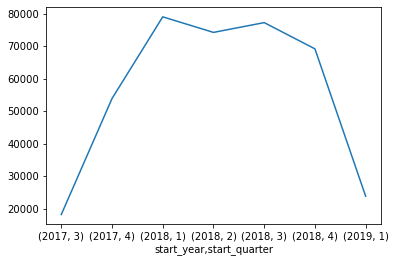

In [24]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax=df_quarter.plot()

자료가 2017년 3분기 후반(8월)부터 2019년 1분기 중순(2월)을 담고 있으므로 2017년 3분기와 2019년 1분기는 완전한 자료를 가지고 있다고 하기 어렵다. 따라서 이를 제외하고 나머지를 살펴보자면 2018년 1분기와 3분기에 청원이 가장 많았음을 알 수 있으며, 2017년과 2018년 4분기에는 다소 청원의 수가 적다.